<a href="https://colab.research.google.com/github/Hk9193/data-scienece-/blob/main/pandastask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('student_performance.csv')
df.head()


,Student_ID,Gender,Age,Study_Hours,Attendance(%),Math_Score,Reading_Score,Writing_Score,Parental_Education,Internet_Access,Extracurricular
0,1,Male,15,11.3,72,100.0,96.0,64.0,Bachelor,No,No
1,2,Female,18,15.3,92,100.0,69.0,85.0,PhD,No,Yes
2,3,Male,19,8.0,93,100.0,75.0,100.0,PhD,No,Yes
3,4,Male,18,4.9,94,100.0,58.0,92.0,Master,No,No
4,5,Male,19,12.0,60,59.0,93.0,69.0,PhD,Yes,No


In [ ]:
df.info()
print(df.isnull().sum())
df = df.dropna()

df['AverageScore'] = df[['Math_Score', 'Reading_Score', 'Writing_Score']].mean(axis=1)

df['Study_Hours']= df['Study_Hours'].astype(float)
df['AverageScore']= df['AverageScore'].astype(float)

# Remove outliers using IQR method
Q1 = df['AverageScore'].quantile(0.25)
Q3 = df['AverageScore'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['AverageScore'] < (Q1 - 1.5 * IQR)) | (df['AverageScore'] > (Q3 + 1.5 * IQR)))]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          200 non-null    int64  
 1   Gender              200 non-null    object 
 2   Age                 200 non-null    int64  
 3   Study_Hours         200 non-null    float64
 4   Attendance(%)       200 non-null    int64  
 5   Math_Score          200 non-null    float64
 6   Reading_Score       200 non-null    float64
 7   Writing_Score       200 non-null    float64
 8   Parental_Education  200 non-null    object 
 9   Internet_Access     200 non-null    object 
 10  Extracurricular     200 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 17.3+ KB
Student_ID            0
Gender                0
Age                   0
Study_Hours           0
Attendance(%)         0
Math_Score            0
Reading_Score         0
Writing_Score         0
Par

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


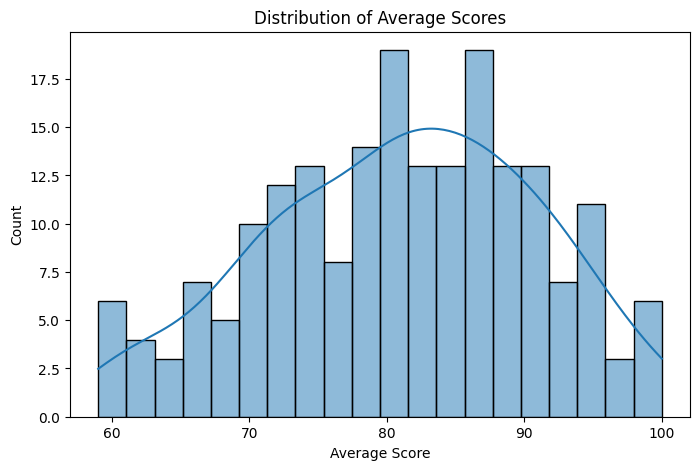

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['AverageScore'], bins=20, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.show()

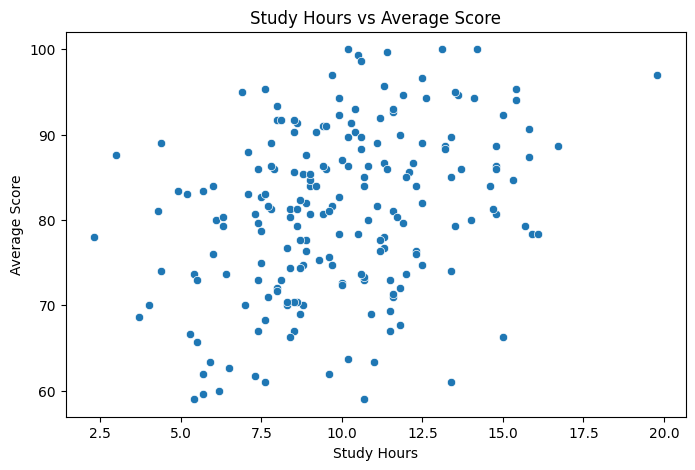

Correlation between Study Hours and Average Score: 0.33


In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Study_Hours', y='AverageScore', data=df)
plt.title('Study Hours vs Average Score')
plt.xlabel('Study Hours')
plt.ylabel('Average Score')
plt.show()

# Correlation
corr = df['Study_Hours'].corr(df['AverageScore'])
print(f"Correlation between Study Hours and Average Score: {corr:.2f}")

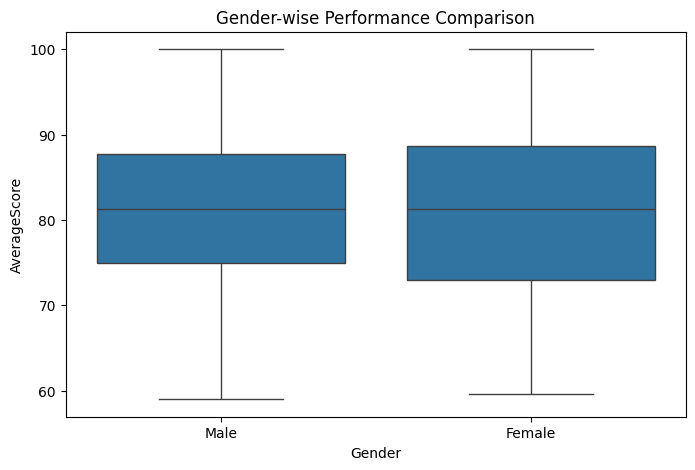

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='AverageScore', data=df)
plt.title('Gender-wise Performance Comparison')
plt.show()


/tmp/ipython-input-4038046480.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Parental_Education', y='AverageScore', data=df, ci=None)


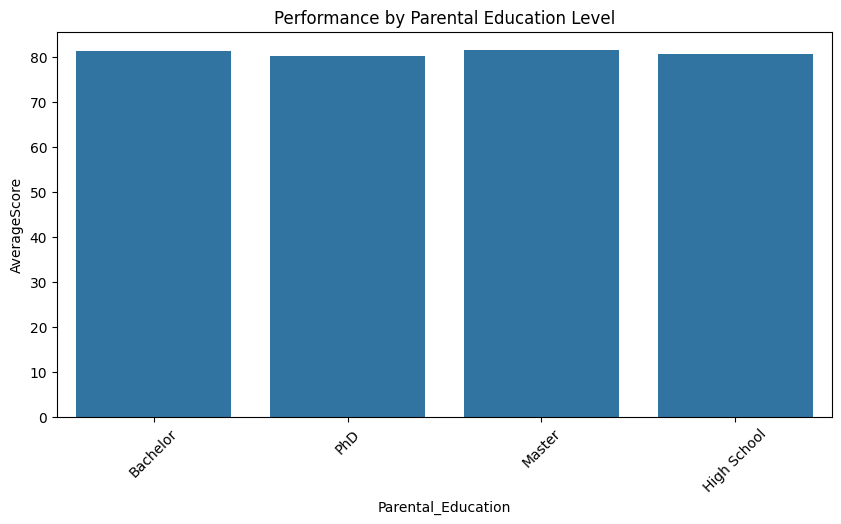

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Parental_Education', y='AverageScore', data=df, ci=None)
plt.title('Performance by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

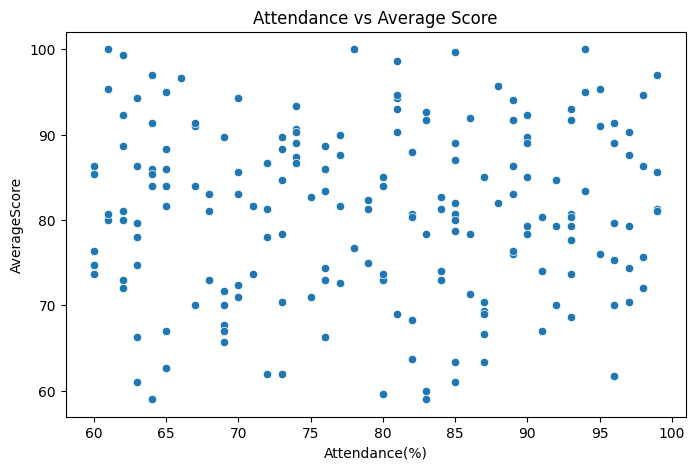

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Attendance(%)', y='AverageScore', data=df)
plt.title('Attendance vs Average Score')
plt.show()

In [ ]:
print("📊 Insights:")
print("- Higher study hours generally show a positive correlation with scores.")
print("- Gender-wise comparison reveals which gender tends to score higher.")
print("- Students with better parental education tend to perform slightly better.")
print("- Attendance shows a positive impact on performance — consistent students perform better.")


📊 Insights:
- Higher study hours generally show a positive correlation with scores.
- Gender-wise comparison reveals which gender tends to score higher.
- Students with better parental education tend to perform slightly better.
- Attendance shows a positive impact on performance — consistent students perform better.
